# MNIST Regularisierung

## Imports

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd

## Datensatz laden

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Daten von 3D Tensor zu 2D Tensor umwandeln

In [3]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

## Farbwerte von 0 - 255 auf 0 - 1.0 normalisieren

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

## One-Hot Encoding

In [5]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Modell definieren

In [6]:
simple_model = tf.keras.models.Sequential()
simple_model.name = "simple_model"
simple_model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
simple_model.add(tf.keras.layers.Dense(64, activation='relu'))
simple_model.add(tf.keras.layers.Dense(32, activation='relu'))
simple_model.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Modell kompilieren

In [7]:
simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Modell trainieren

In [10]:
hist1 = simple_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.20)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9777 - val_loss: 0.1765
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9737 - val_loss: 0.2187
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9976 - loss: 0.0095 - val_accuracy: 0.9786 - val_loss: 0.1641
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accuracy: 0.9775 - val_loss: 0.1933
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 0.9779 - val_loss: 0.1800
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9760 - val_loss: 0.2089
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9986 - loss: 0.0052 - val_accuracy: 0.9778 - val_loss: 0.1872
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9992 - loss: 0.0031 - 

### Modell mit leichter Regularisierung

In [11]:
light_regularized_model = tf.keras.models.Sequential()
light_regularized_model.name="light_regularized_model"

light_regularized_model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
light_regularized_model.add(tf.keras.layers.Dense(64, activation = 'relu'))
light_regularized_model.add(tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer='l1'))
light_regularized_model.add(tf.keras.layers.Dense(10, activation='softmax'))


### Festlegung der Loss Function und des Optimizers
light_regularized_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Als Optimizer wurde der Adam Algorithmus gesetzt.

### Erstellen eines Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3) 

In [12]:
hist2 = light_regularized_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[callback])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8493 - loss: 1.4090 - val_accuracy: 0.9530 - val_loss: 0.3195
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9547 - loss: 0.2871 - val_accuracy: 0.9628 - val_loss: 0.2190
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1915 - val_accuracy: 0.9669 - val_loss: 0.1831
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.1451 - val_accuracy: 0.9672 - val_loss: 0.1727
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.1222 - val_accuracy: 0.9750 - val_loss: 0.1351
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0962 - val_accuracy: 0.9737 - val_loss: 0.1293
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0863 - val_accuracy: 0.9638 - val_loss: 0.1670
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0748 - 

### Modell mit starker Regularisierung

In [13]:
fully_regularized_model = tf.keras.models.Sequential()
fully_regularized_model.name="fully_regulated_model"

fully_regularized_model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
fully_regularized_model.add(tf.keras.layers.BatchNormalization())
fully_regularized_model.add(tf.keras.layers.Dense(64, activation='relu'))
fully_regularized_model.add(tf.keras.layers.BatchNormalization())
fully_regularized_model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l1'))
fully_regularized_model.add(tf.keras.layers.BatchNormalization())
fully_regularized_model.add(tf.keras.layers.Dense(10, activation='softmax'))

fully_regularized_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [14]:
hist3 = fully_regularized_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[callback2])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 1.5441 - val_accuracy: 0.9491 - val_loss: 0.2873
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.2763 - val_accuracy: 0.9650 - val_loss: 0.2164
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9624 - loss: 0.2143 - val_accuracy: 0.9597 - val_loss: 0.2260
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9687 - loss: 0.1863 - val_accuracy: 0.9721 - val_loss: 0.1658
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9717 - loss: 0.1681 - val_accuracy: 0.9712 - val_loss: 0.1728
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.1510 - val_accuracy: 0.9715 - val_loss: 0.1695
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9777 - loss: 0.1404 - val_accuracy: 0.9716 - val_loss: 0.1707
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9791 - loss: 0.1289 - 

## Modelle vergleichen

### Vergleich einfaches Modell mit teilweise regulierten Modellen

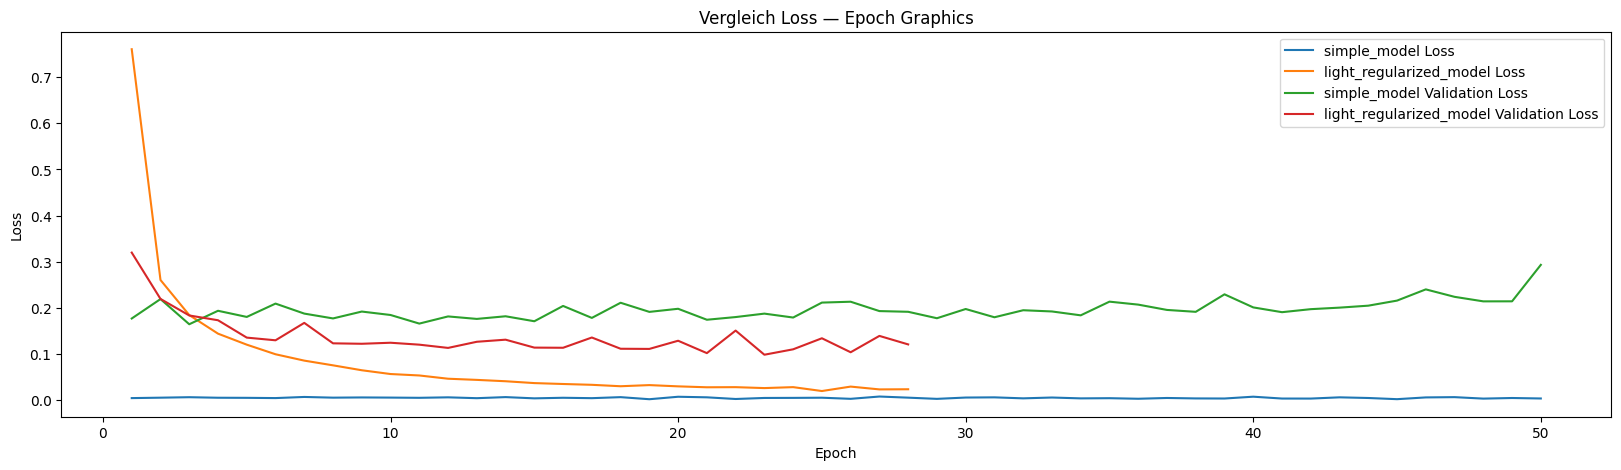

In [15]:
figure1 = plt.figure()
figure1.set_size_inches((20, 5))
plt.title('Vergleich Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(range(1, len(hist1.history['loss']) + 1), hist1.history['loss'], label=f'{simple_model.name} Loss')
plt.plot(range(1, len(hist2.history['loss']) + 1), hist2.history['loss'], label=f'{light_regularized_model.name} Loss')

plt.plot(range(1, len(hist1.history['val_loss']) + 1), hist1.history['val_loss'], label=f'{simple_model.name} Validation Loss') 
plt.plot(range(1, len(hist2.history['val_loss']) + 1), hist2.history['val_loss'], label=f'{light_regularized_model.name} Validation Loss')

plt.legend()
plt.show()


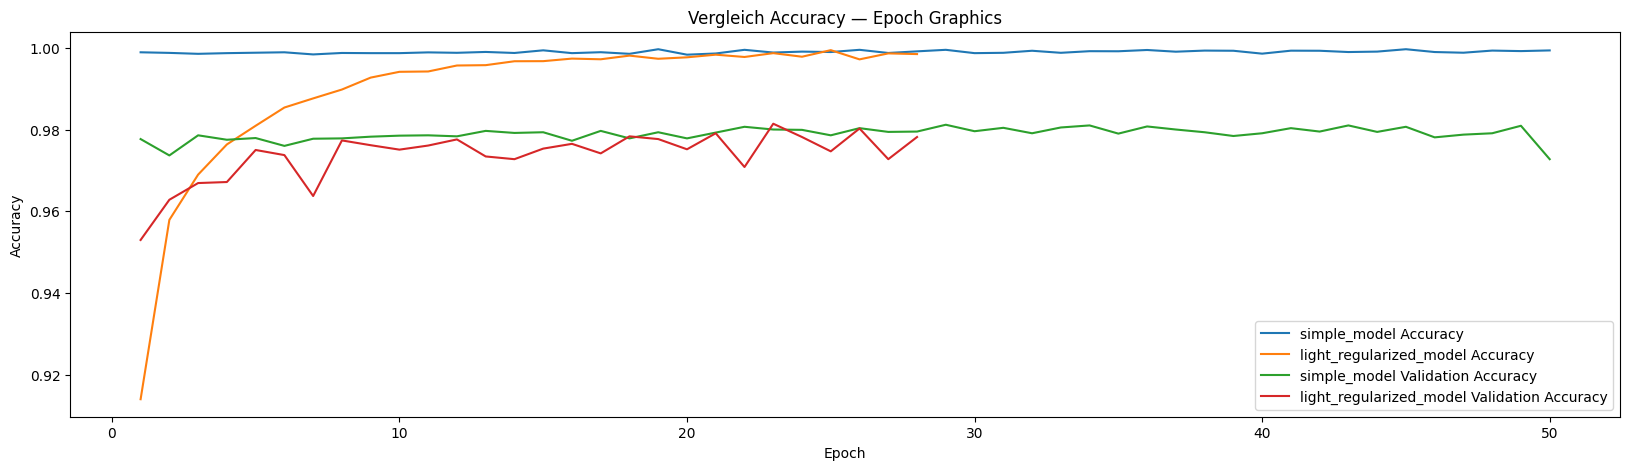

In [16]:
figure2 = plt.figure()
figure2.set_size_inches((20, 5))
plt.title('Vergleich Accuracy — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.plot(range(1, len(hist1.history['accuracy']) + 1), hist1.history['accuracy'], label=f'{simple_model.name} Accuracy')
plt.plot(range(1, len(hist2.history['accuracy']) + 1), hist2.history['accuracy'], label=f'{light_regularized_model.name} Accuracy')

plt.plot(range(1, len(hist1.history['val_accuracy']) + 1), hist1.history['val_accuracy'], label=f'{simple_model.name} Validation Accuracy')
plt.plot(range(1, len(hist2.history['val_accuracy']) + 1), hist2.history['val_accuracy'], label=f'{light_regularized_model.name} Validation Accuracy')

plt.legend()
plt.show()

### Vergleich einfaches Modell mit stark regulierten Modellen

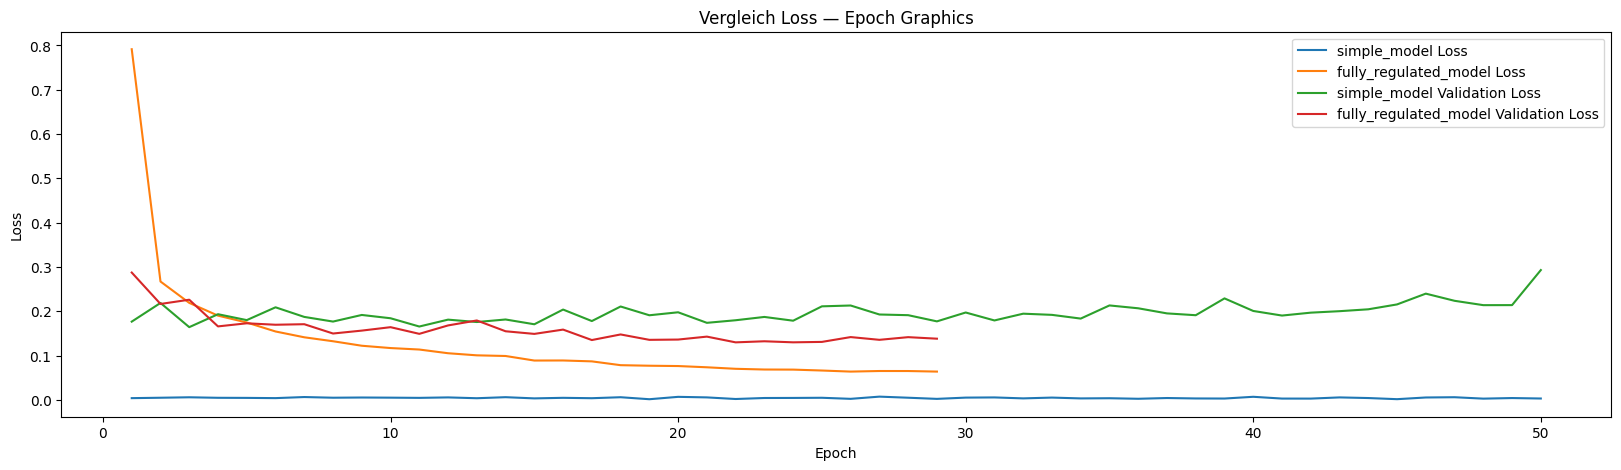

In [17]:
figure3 = plt.figure()
figure3.set_size_inches((20, 5))
plt.title('Vergleich Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(range(1, len(hist1.history['loss']) + 1), hist1.history['loss'], label=f'{simple_model.name} Loss')
plt.plot(range(1, len(hist3.history['loss']) + 1), hist3.history['loss'], label=f'{fully_regularized_model.name} Loss')

plt.plot(range(1, len(hist1.history['val_loss']) + 1), hist1.history['val_loss'], label=f'{simple_model.name} Validation Loss') 
plt.plot(range(1, len(hist3.history['val_loss']) + 1), hist3.history['val_loss'], label=f'{fully_regularized_model.name} Validation Loss')

plt.legend()
plt.show()

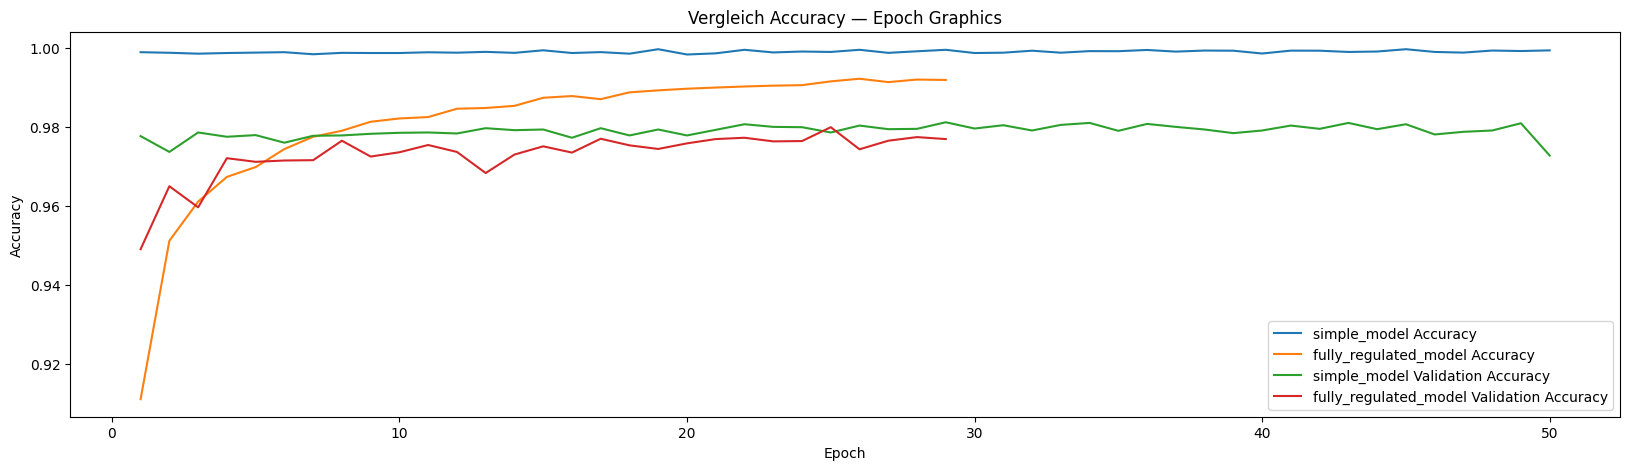

In [18]:
figure4 = plt.figure()
figure4.set_size_inches((20, 5))
plt.title('Vergleich Accuracy — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.plot(range(1, len(hist1.history['accuracy']) + 1), hist1.history['accuracy'], label=f'{simple_model.name} Accuracy')
plt.plot(range(1, len(hist3.history['accuracy']) + 1), hist3.history['accuracy'], label=f'{fully_regularized_model.name} Accuracy')

plt.plot(range(1, len(hist1.history['val_accuracy']) + 1), hist1.history['val_accuracy'], label=f'{simple_model.name} Validation Accuracy')
plt.plot(range(1, len(hist3.history['val_accuracy']) + 1), hist3.history['val_accuracy'], label=f'{fully_regularized_model.name} Validation Accuracy')

plt.legend()
plt.show()

### Vergleich leicht regularisiertes Modell mit stark regularisierten Modellen

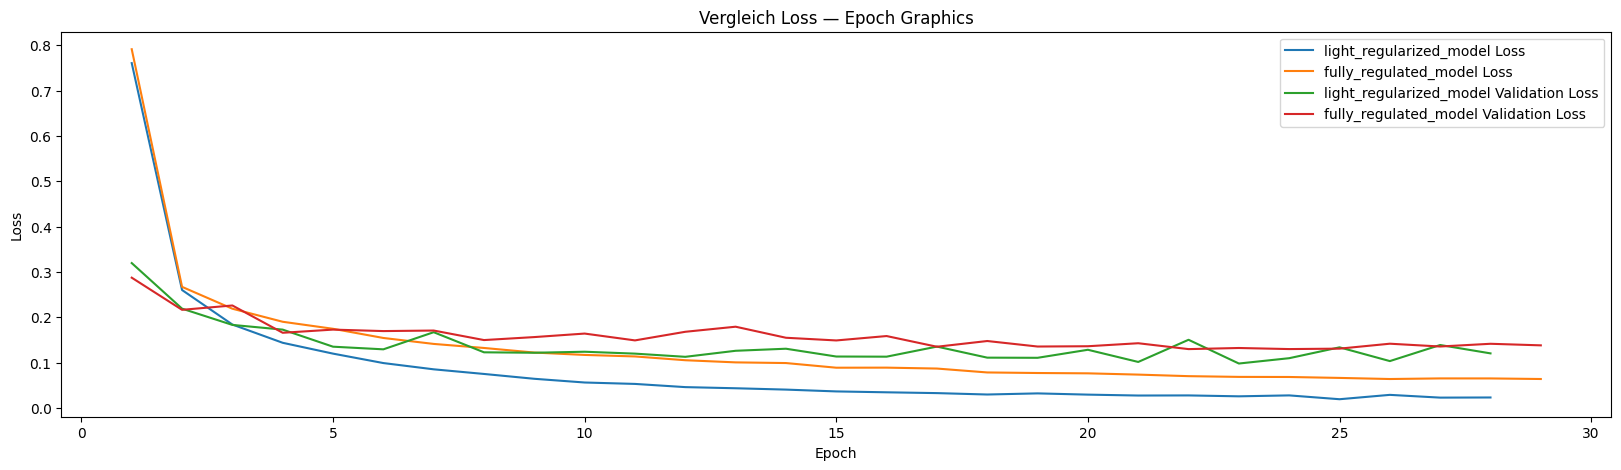

In [19]:
figure5 = plt.figure()
figure5.set_size_inches((20, 5))
plt.title('Vergleich Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(range(1, len(hist2.history['loss']) + 1), hist2.history['loss'], label=f'{light_regularized_model.name} Loss')
plt.plot(range(1, len(hist3.history['loss']) + 1), hist3.history['loss'], label=f'{fully_regularized_model.name} Loss')

plt.plot(range(1, len(hist2.history['val_loss']) + 1), hist2.history['val_loss'], label=f'{light_regularized_model.name} Validation Loss') 
plt.plot(range(1, len(hist3.history['val_loss']) + 1), hist3.history['val_loss'], label=f'{fully_regularized_model.name} Validation Loss')

plt.legend()
plt.show()

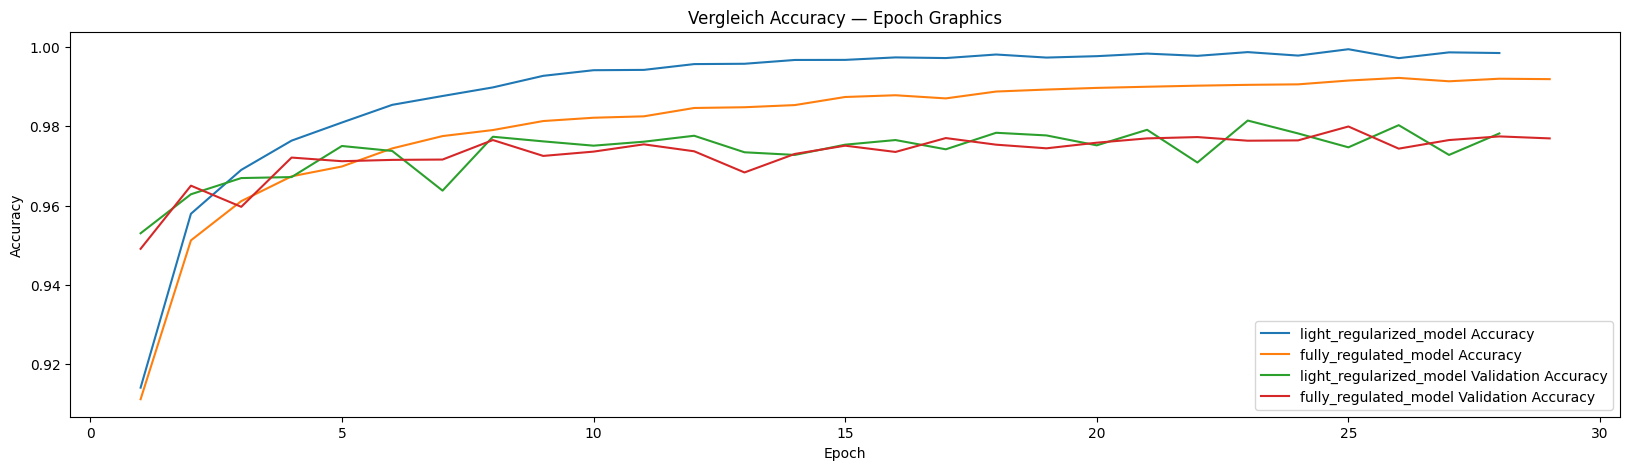

In [20]:
figure6 = plt.figure()
figure6.set_size_inches((20, 5))
plt.title('Vergleich Accuracy — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.plot(range(1, len(hist2.history['accuracy']) + 1), hist2.history['accuracy'], label=f'{light_regularized_model.name} Accuracy')
plt.plot(range(1, len(hist3.history['accuracy']) + 1), hist3.history['accuracy'], label=f'{fully_regularized_model.name} Accuracy')

plt.plot(range(1, len(hist2.history['val_accuracy']) + 1), hist2.history['val_accuracy'], label=f'{light_regularized_model.name} Validation Accuracy')
plt.plot(range(1, len(hist3.history['val_accuracy']) + 1), hist3.history['val_accuracy'], label=f'{fully_regularized_model.name} Validation Accuracy')

plt.legend()
plt.show()